## Perform DE analysis

In [1]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [2]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/DE_Tms_Tml')

In [3]:
## Loading data
data <- read.table("DESeq2_count_matrix_Tml_Tms.csv", sep=",",header = T,row.names=1)
meta_new <- read.csv("DESeq2_Tml_Tms_sample_annotation_new.tsv", sep = "\t", row.names="sample")
## first column is row names: row.names = 1

In [4]:
## Remove the outlier Tml_1
data_new <- data[c("Tml_2", "Tml_3", "Tms_1", "Tms_2", "Tms_3")]

In [5]:
head(data_new)

,Tml_2,Tml_3,Tms_1,Tms_2,Tms_3
,<int>,<int>,<int>,<int>,<int>
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,58,79,63,65,63
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,137,111,130,154,195
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,20,9,11,30,21
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,38,47,32,43,76
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,337,388,362,405,497
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,49,58,84,40,93


In [6]:
meta_new

,species
,<fct>
Tml_2,Tml
Tml_3,Tml
Tms_1,Tms
Tms_2,Tms
Tms_3,Tms


In [7]:
all(rownames(meta_new) == colnames(data_new))

[1] TRUE

In [8]:
## Creat DESeq object
dds <- DESeqDataSetFromMatrix(countData = data_new, colData = meta_new, design = ~ species)

In [9]:
## Run DE analysis
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



### Everything from normalization to linear modeling was carried out by the use of a single function!
  - Estimate size factors: for reads normalization
  - Estimate gene-wise dispersion
    - Dispersion is a measure of spread or variability in the data
    - the dispersion estimates reflect the variance in gene expression for a given mean value
    - Given the count values of the replicates, the most likely estimate of dispersion is calculated
  - Fit curve to gene-wise dispersion estimates: overall, there will be a distribution of reasonable estimates of dispersion
  - Shrink gene-wise disperion estimates toward the values predicted by the curve

### This is a good plot to examine to ensure your data is a good fit for the DESeq2 model. You expect your data to generally scatter around the curve, with the dispersion decreasing with increasing mean expression levels.

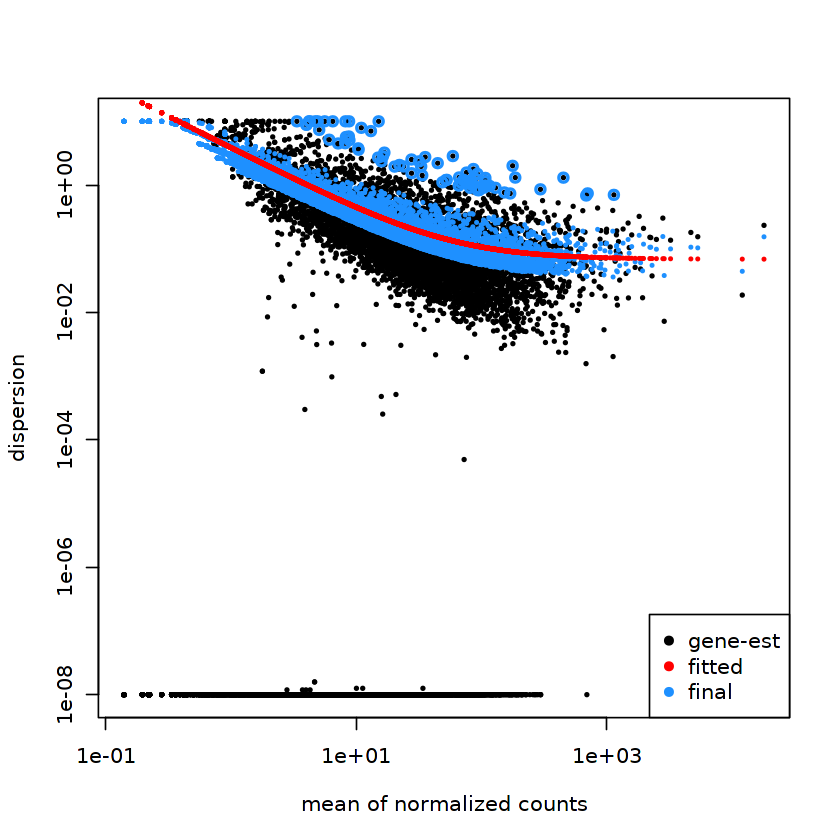

In [10]:
plotDispEsts(dds)

### Generalized Linear Model fit for each gene
### To generate more accurate log2 foldchange estimates, DESeq2 allows for the **shrinkage of the LFC estimates toward 0** when the information for a gene is low
  - Shrinking the log2 fold changes will not change the total number of genes that are identified as significantly differentially expressed.

### Hypothesis testing using the Wald test

### Building the results table

In [11]:
## Define contrasts, extract results table, and shrink the log2 fold changes
## Tms (the second element) is the baseline;
## cutoff of adjusted p-value (FDR) is set as 0.05
contrast <- c("species", "Tml", "Tms")
res_table_unshrunken <- results(dds, contrast=contrast, alpha = 0.05)
res_table <- lfcShrink(dds, contrast=contrast, res=res_table_unshrunken)

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



### MA Plot

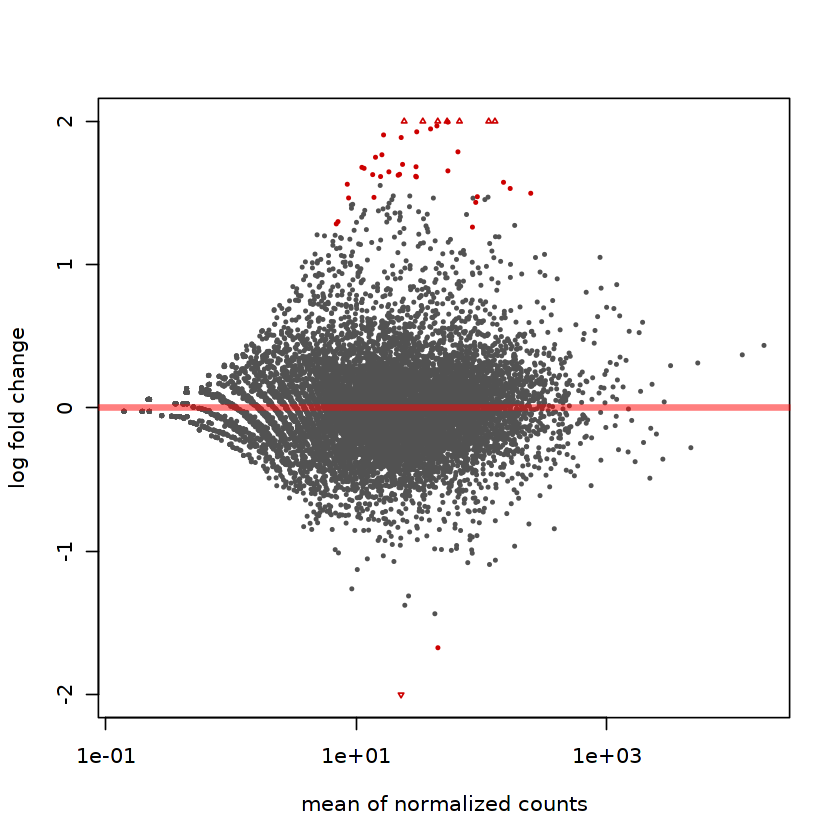

In [12]:
plotMA(res_table, ylim=c(-2,2))

In [13]:
class(res_table)

[1] "DESeqResults"
attr(,"package")
[1] "DESeq2"

In [14]:
## To extract information regarding the meaning of each column
mcols(res_table, use.names=T)

DataFrame with 6 rows and 2 columns
                       type                                description
                <character>                                <character>
baseMean       intermediate  mean of normalized counts for all samples
log2FoldChange      results log2 fold change (MAP): species Tml vs Tms
lfcSE               results         standard error: species Tml vs Tms
stat                results         Wald statistic: species Tml vs Tms
pvalue              results      Wald test p-value: species Tml vs Tms
padj                results                       BH adjusted p-values

### On p-value set to NA
  - If within a row, all samples have zero counts, the baseMean column will be zero, and the log2 fold change estimates, p-value and adjusted p-value will all be set to NA.
  - If a row contains a sample with an extreme count outlier then the p-value and adjusted p-value will be set to NA. These outlier counts are detected by Cook’s distance.
  - If a row is filtered by automatic independent filtering, for having a low mean normalized count, then only the adjusted p-value will be set to NA.

### In DESeq2, the p-values attained by the Wald test are corrected for multiple testing using the Benjamini and Hochberg method by default. The p-adjusted values should be used to determine significant genes.
By setting the FDR cutoff to < 0.05, we're saying that the proportion of false positives we expect amongst our differentially expressed genes is 5%. For example, if you call 500 genes as differentially expressed with an FDR cutoff of 0.05, you expect 25 of them to be false positives.

In [15]:
summary(res_table)


out of 11188 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 39, 0.35%
LFC < 0 (down)     : 2, 0.018%
outliers [1]       : 0, 0%
low counts [2]     : 2595, 23%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### Extracting significant differentially expressed genes

In [17]:
sig <- subset(res_table, padj < 0.05)

In [19]:
head(sig)

log2 fold change (MAP): species Tml vs Tms 
Wald test p-value: species Tml vs Tms 
DataFrame with 6 rows and 6 columns
                                                             baseMean
                                                            <numeric>
Tpr_TRINITY_DN15171_c0_g7|Tdu_TRINITY_DN23860_c1_g4  16.5323049970822
Tpr_TRINITY_DN12636_c2_g10|Tdu_TRINITY_DN19969_c1_g5 114.182419567549
Tpr_TRINITY_DN12563_c2_g5|Tdu_TRINITY_DN14402_c0_g1  16.0385895390701
Tpr_TRINITY_DN12330_c1_g6|Tdu_TRINITY_DN22079_c1_g1   53.945656306292
Tpr_TRINITY_DN11715_c3_g3|Tdu_TRINITY_DN17458_c2_g1  34.0207551560748
Tpr_TRINITY_DN14330_c1_g6|Tdu_TRINITY_DN18647_c0_g2  23.4433285092118
                                                       log2FoldChange
                                                            <numeric>
Tpr_TRINITY_DN15171_c0_g7|Tdu_TRINITY_DN23860_c1_g4  1.90510209750303
Tpr_TRINITY_DN12636_c2_g10|Tdu_TRINITY_DN19969_c1_g5 2.10115352183151
Tpr_TRINITY_DN12563_c2_g5|Tdu_TRINITY_DN1

In [18]:
write.table(sig, "DESeq2_DE_Tms_Tml.txt", sep="\t", quote=F, row.names = TRUE)